# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Spring 2024

_According to the **Academic Integrity Policy** of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

This homework is an **individual assignment for all graduate students**. **Undergraduate students are allowed to work in pairs and submit one homework assignment per pair**. There will be no extra credit given to undergraduate students who choose to work alone. The pairs of students who choose to work together and submit one homework assignment together still need to abide by the Academic Integrity Policy and not share or receive help from others (except each other).

There are three parts in this homework. The first one is a practice introduction to `matplotlib` (5%). The second is a guided exploration of a bikeshare dataset (40%). The third one is a self-guided exploration of a dataset on `2022 National Public Opinion Reference Survey(NPORS)` from [Pew Research](https://www.pewresearch.org/) (55%). You can also earn extra credit of 20%.


## Due Date

This assignment is due at 11:59pm Thursday, February 22nd. 


### What to Submit

You need to complete all code and answer all questions denoted by **Q#** (each one is under a bike image) in this notebook. When you are done, you should export **hw2.ipynb** with your answers as a PDF file, upload the PDF file to *Homework 2 - Written Part* on Gradescope, tagging each question. You need to upload a completed Jupyter notebook (hw2.ipynb file) to *Homework 2 - code* on Gradescope. If one of these two parts (written and code) is missing, you will lose 50%. For undergraduate students who work in a team of two, only one student needs to submit the homework and just tag the other student on Gradescope.

#### Autograding

We will not use autograding for this homework assignment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt
	
The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `cos(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

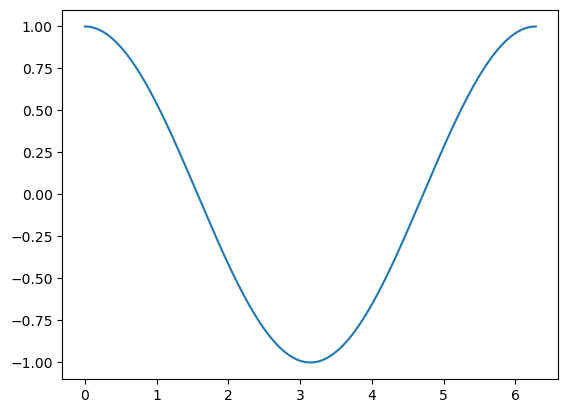

In [2]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.cos(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

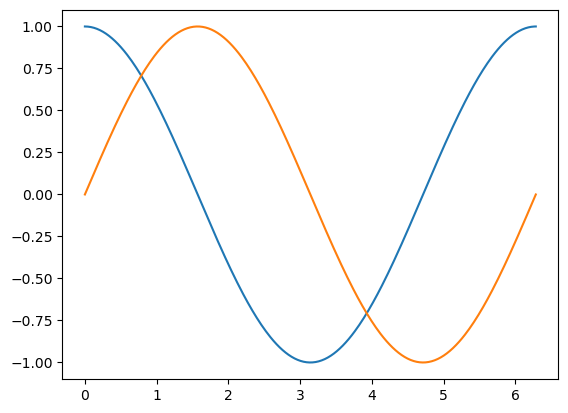

In [3]:
plt.plot(xs, ys)
plt.plot(xs, np.sin(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

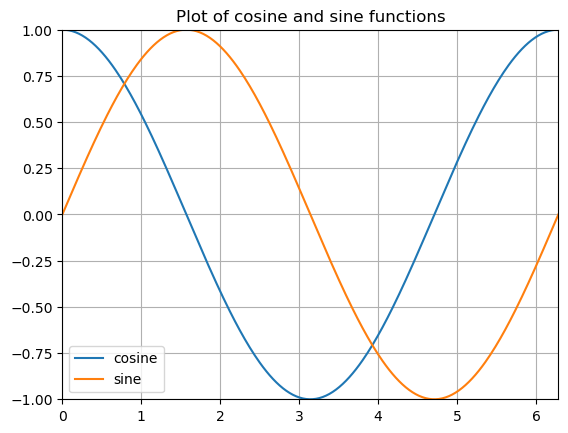

In [4]:
# Here's the starting code from last time. Edit / Add code to create the plot above.

# Plot the cosine function
plt.plot(xs, ys, label='cosine')

# Plot the sine function
plt.plot(xs, np.sin(xs), label='sine')

# Set x and y limits
plt.xlim(0, 2 * np.pi)
plt.ylim(-1, 1)

# Add a title
plt.title('Plot of cosine and sine functions')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C. 

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [5]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

instant              dteday  season  holiday  weekday  workingday  \
0        1 2011-01-01 00:00:00       1        0        6           0   
1        2 2011-01-01 01:00:00       1        0        6           0   
2        3 2011-01-01 02:00:00       1        0        6           0   
3        4 2011-01-01 03:00:00       1        0        6           0   
4        5 2011-01-01 04:00:00       1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.1 (4%):
Explore the `bike_trips` dataframe to answer the following questions.

What is the data granularity?
What time range is represented here? Write code in the cell below to perform your exploration.

In [6]:
# Determine the data granularity by examining the intervals between timestamps
granularity = bike_trips['dteday'].diff().unique()

# Find the minimum and maximum dates to determine the time range
min_date = bike_trips['dteday'].min()
max_date = bike_trips['dteday'].max()

# Print the results
print(f"The data granularity is: {granularity}")
print(f"The time range represented in the dataset is from {min_date} to {max_date}")

The data granularity is: <TimedeltaArray>
[              NaT, '0 days 01:00:00', '0 days 02:00:00', '0 days 03:00:00',
 '0 days 13:00:00', '0 days 23:00:00', '0 days 07:00:00', '0 days 14:00:00',
 '1 days 13:00:00']
Length: 9, dtype: timedelta64[ns]
The time range represented in the dataset is from 2011-01-01 00:00:00 to 2012-12-31 23:00:00


Data Granularity:
The .diff() method calculates the difference between each date and the preceding date in the 'dteday' column, which contains timestamps.
The granularity of the dataset is then shown by the .unique() function, which finds all unique differences to understand the time intervals between records.
This method worked under a presumption that data is already sorted by date. If this isn’t the case, you could use a function to sort data by the 'dteday' column.

Time Range:
The earliest and latest dates that indicate the time period represented by the dataset are found using the .min() and .max() methods on the 'dteday' column.

## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<Axes: xlabel='dteday'>

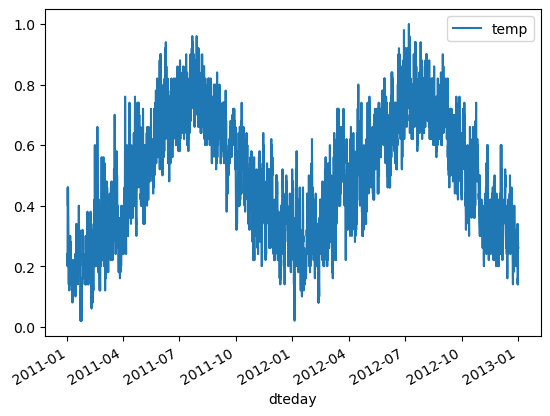

In [7]:
# This plot shows the temperature at each data point

bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

<Axes: xlabel='dteday', ylabel='temp'>

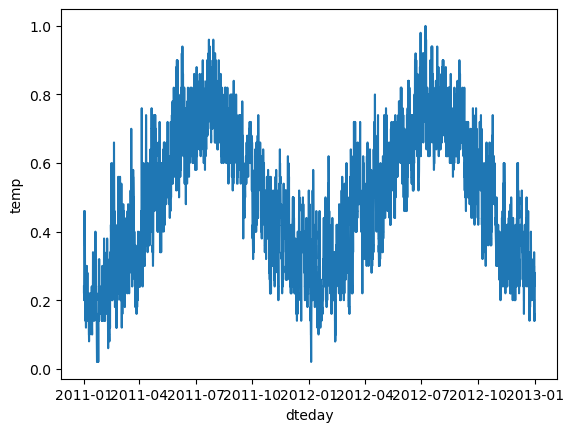

In [8]:
import warnings
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
# Suppress specific FutureWarnings from Seaborn or Pandas
warnings.filterwarnings('ignore', category=FutureWarning)

# Ensure there are no infinite values in the data
bike_trips.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now we can create a plot with Seaborn without warnings
sns.lineplot(x="dteday", y="temp", data=bike_trips)

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.2 (7%):

Use seaborn's `barplot` function to make a bar chart showing the average
number of registered riders on each day of the week over the 
entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html

See if you can figure it out by reading the docs. 

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

Text(0.5, 1.0, 'Average Registered Riders by Day of the Week')

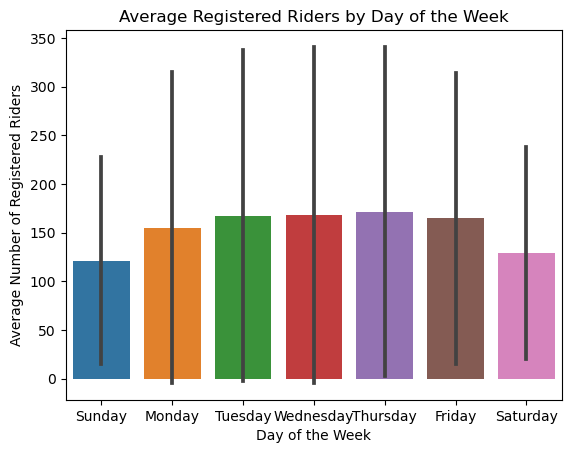

In [9]:
# Create a barplot with the average number of registered riders for each weekday
sns.barplot(x='weekday', y='registered', data=bike_trips, ci='sd', estimator=np.mean)

# Assuming the days of the week are coded 0=Sunday, 1=Monday, ..., 6=Saturday
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks=range(7), labels=day_names)

# Set the labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Registered Riders')
plt.title('Average Registered Riders by Day of the Week')

Weekday Ridership: There's a higher average number of registered riders on weekdays (Monday through Friday) compared to weekends. This pattern is consistent with the typical workweek and suggests that many registered riders may be using the bike-sharing service for commuting purposes.

Weekend Ridership: The average number of registered riders is considerably fewer on Saturday and Sunday. This decline may suggest that fewer individuals commute by bicycle on the weekends, either as a result of altered weekend plans, increased leisure time, or fewer job commitments.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.3 (7%):

Now for a fancier plot that `seaborn` makes really easy to produce.

Use the `displot` function to plot a histogram of all the total rider counts in the `bike_trips` dataset. Can you fit a curve to the histogram of the data using `seaborn`? You just need to tune `kde` and `stat` paramaters to the `displot` function. Fancy!

/Users/dishant/anaconda3/envs/cs418env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Histogram of Total Rider Counts with KDE')

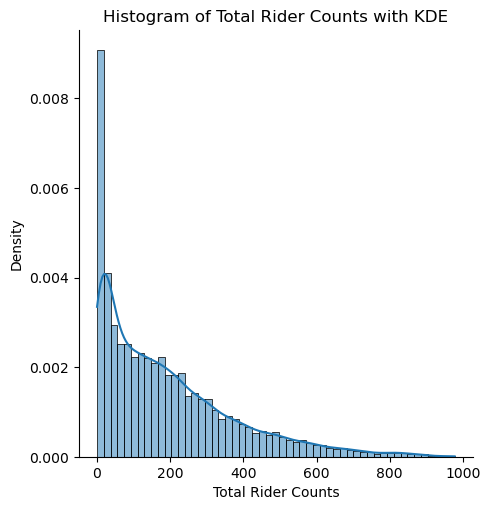

In [10]:
# Create a histogram with a KDE curve
sns.displot(bike_trips['cnt'], kde=True, stat="density")

# Set the labels and title
plt.xlabel('Total Rider Counts')
plt.ylabel('Density')
plt.title('Histogram of Total Rider Counts with KDE')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.4 (7%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like:

![](q5.png)

Revisiting Q1.1 on data granularity, what is more suitable text for `ylabel` than `Number of riders`?

Text(0.5, 1.0, 'Boxplot of Casual and Registered Riders')

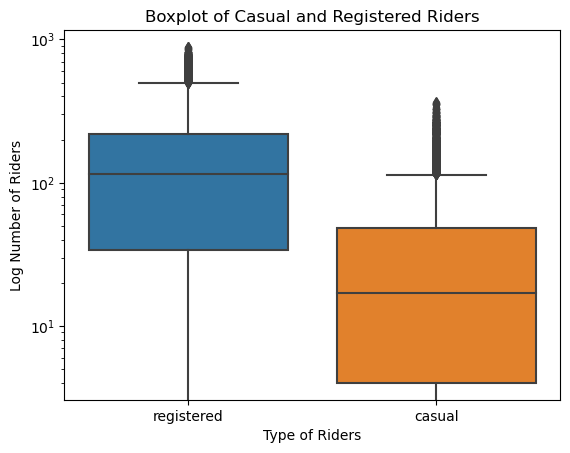

In [11]:
# Create side-by-side boxplots for casual and registered riders
ax = sns.boxplot(data=bike_trips[['registered', 'casual']])

# Customize the y-axis to be logarithmic to better visualize outliers
ax.set_yscale('log')

# Set the labels and title
ax.set_xlabel('Type of Riders')
ax.set_ylabel('Log Number of Riders')
ax.set_title('Boxplot of Casual and Registered Riders')

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.5 (7%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best
fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary 
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like:

![](q1-5.png)


/Users/dishant/anaconda3/envs/cs418env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


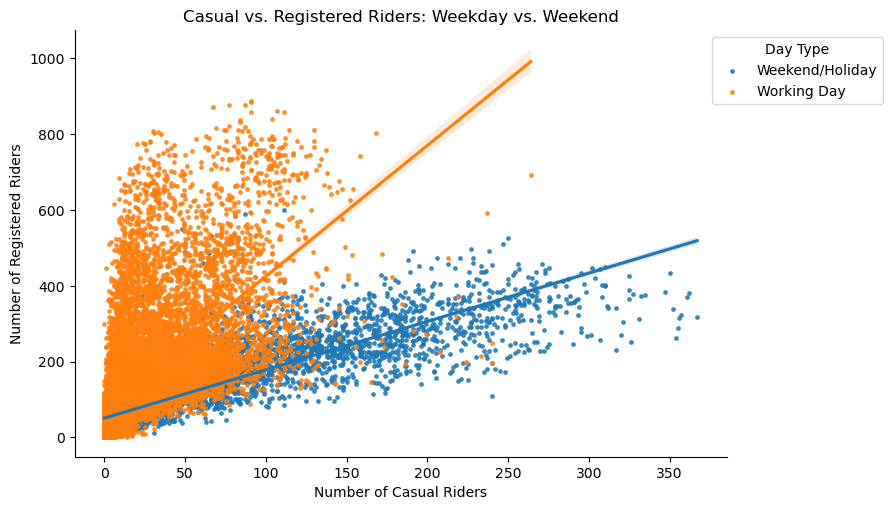

In [12]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.


# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.
# HINT: ax = sns.lmplot(..., legend=True)
# legendObj = ax.legend # Modify this object
# Create a scatter plot with a line of best fit, distinguishing weekdays from weekends
plot = sns.lmplot(x='casual', y='registered', hue='workingday', data=bike_trips, aspect=1.5, scatter_kws={'s': 6})

# Enhancing the plot
plt.title('Casual vs. Registered Riders: Weekday vs. Weekend')
plt.xlabel('Number of Casual Riders')
plt.ylabel('Number of Registered Riders')

# Remove the existing legend
plot._legend.remove()

# Create a new legend with more descriptive labels and place it at the top right, outside the plot
leg_labels = ['Weekend/Holiday', 'Working Day']
leg_handles = plot._legend_data.values()
plt.legend(handles=leg_handles, labels=leg_labels, title='Day Type', loc='upper right', bbox_to_anchor=(1.25, 1))


## `plotly`

Now, we'll learn how to use the [`plotly`](https://plotly.com/python/) Python library. `plotly` is a very powerful and versatile Python library used for creating interactive and visually appealing data visualizations. It provides an extensive variety of chart types, spanning from basic line and scatter plots to the creation of complex 3D visualizations and geographic maps. Similar to `seaborn`, almost all `plotly` functions are designed to operate on pandas dataframes. `plotly` also provides an intuitive and user-friendly interface, making it popular among data scientists and analysts. It comes with interactive features like zooming, panning, and hover effects, letting you explore your data in a more convenient way and discover important stuff. Interactive charts are super useful for exploring data and making engaging presentations. Moreover, `plotly` can allow you to save plots as SVG files, making sure the images remain sharp even when you zoom in.

`plotly` offers a user-friendly "express" API for making basic plots. The `plotly.express` module provides a concise API for making these plots. For basic introduction on how to use `plotly.express` module to draw plots, we recommend to read this at first: https://learningds.org/ch/11/viz_plotly.html. You can also find the official document of `plotly` [here](https://plotly.com/python/).

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q1.6 (8%)
At first, you need to redraw the box plot from **Q1.4** using `plotly` library. See [this documentation](https://plotly.com/python/box-plots/) for drawing a box plot using `plotly.express`.

The result should look like:

![](q6_part1.png)

In [13]:
# Plot the box plot from Q1.4 here using plotly 
# Use width=640 and height=480 to make your plot exactly as the same size of the reference figure. 
# You can choose color by your choice for the boxes in the plot but make sure they are clearly visible and not distracting.
# First, melt the DataFrame to have 'registered' and 'casual' in the same column
bike_trips_melted = bike_trips.melt(value_vars=['registered', 'casual'], 
                                    var_name='Type of Riders', value_name='Number of Riders')

# Now create the box plot using the melted DataFrame
fig = px.box(bike_trips_melted, 
             y='Number of Riders', 
             x='Type of Riders', 
             color='Type of Riders',  # color code by rider type
             labels={'Type of Riders': 'Type of Riders', 'Number of Riders': 'Number of Riders'},
             color_discrete_sequence=px.colors.qualitative.Pastel,
             width=640, height=480)

# Update layout for better readability and aesthetics
fig.update_layout(
    title='Number of Riders: Registered vs Casual',
    yaxis_type="log",  # Setting y-axis to log scale
    yaxis_title='Number of Riders (Log Scale)',
    xaxis_title='Type of Riders'
)

Now, you will redraw the scatter plot from **Q1.5** using `plotly` library. See [this documentation](https://plotly.com/python/line-and-scatter/) for drawing a scatter plot using `plotly.express`. By default `plotly` will not draw the center lines that best fit the data. You need to pass `trendline='ols'` to the `scatter` function if you want to show the lines.

Finally, the result should look like:

![](q6_part2.png)

In [14]:
# Plot the scatter plot from Q1.5 here using plotly
# Use width=640 and height=480 to make your plot exactly as the same size of the reference figure. 
# You can choose color by your choice but make sure they are clearly visible and not distracting.

bike_trips['Day Type'] = bike_trips['workingday'].apply(lambda x: 'working day' if x == 1 else 'weekend/holiday')

# Create a scatter plot
fig = px.scatter(bike_trips, x='casual', y='registered', 
                 color='Day Type',  # This will set different colors for weekend/holiday vs. working day
                 trendline='ols',  # This will draw the OLS trend line
                 labels={'casual': 'Number of Casual Riders', 'registered': 'Number of Registered Riders'},
                 title='Casual vs. Registered Riders on Working Days and Weekends/Holidays',
                 width=640, height=480)

# Update layout if necessary, for example, to change marker size for better visibility
fig.update_traces(marker=dict(size=5))


## Want to learn more?

We recommend checking out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

You can also check for the API's of `plotly` here. https://plotly.com/python-api-reference/

Here's a great post demonstrating the differences between Python's visualization libraries:
https://medium.datadriveninvestor.com/the-battle-among-4-python-data-visualization-tools-f4e90ab157ac


# Part 2: Self-directed EDA on National Public Opinion Reference Survey (55%)

The last part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on `2022 National Public Opinion Reference Survey(NPORS)` and extract some meaningful and valuable insights. 

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your three most significant findings (_Q2.2, Q2.3, and Q2.4_). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For example, the visualization headline could be "_Snapchat and TikTok users perceive poorer economic conditions than users on other platforms._" with the following bar plot visualization:  

<img src="q2-1.png" width="640">


The survey data that you will analyze was collected by [Pew Research](https://www.pewresearch.org/). You will find it inside `NPORS-2022-Data-Release` folder under your `hw2` directory. You can also find and download the dataset from [here](https://www.pewresearch.org/methods/dataset/2022-national-public-opinion-reference-survey-npors/) by creating an account. The data file you will work with is `NPORS_2022_for_public_release.sav`. The file that contains information about the meaning of each feature is `2022-NPORS-Online-Questionnaire.pdf`. You will also find it inside `NPORS-2022-Data-Release` folder under your `hw2` directory.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 10 and 11 of LDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types. For this **Part 2**, you are free to use either `seaborn` or `plotly` library of your choice.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices


<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `NPORS_2022_for_public_release.sav`, and understand what is stored in it. Read the survey questionnaire in `2022-NPORS-Online-Questionnaire.pdf` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

In order to load a `.sav` file into a `dataframe`, you need to install [`pyreadstat`](https://pypi.org/project/pyreadstat/) python package into your `cs418env`. You can install it using the command: `pip install pyreadstat`. After installing it into your `cs418env`, please researt the kernel form this notebook or close and open the notebook to take effect of the installation. Now, we can load the dataset into a dataframe.

In [15]:
df_npors = pd.read_spss("NPORS-2022-Data-Release/NPORS_2022_for_public_release.sav")
df_npors.head()

RESPID    MODE     INTERVIEW_START       INTERVIEW_END DEVICE_TYPE  \
0     1.0  Online 2022-06-11 17:51:33 2022-06-11 17:58:52   Laptop/PC   
1     2.0    Mail                 NaT                 NaT         NaN   
2     3.0  Online 2022-06-22 10:40:35 2022-06-22 10:48:10  Smartphone   
3     4.0  Online 2022-06-18 05:23:34 2022-06-18 05:32:41  Smartphone   
4     5.0  Online 2022-06-27 18:39:18 2022-06-27 18:57:17   Laptop/PC   

                       PSTRATA LANG_PREF   ECON1MOD       ECON1BMOD  \
0                     All else   English  Excellent           Worse   
1  Hispanic 25+ or Unknown age   English  Excellent  About the same   
2  Hispanic 25+ or Unknown age   English       Poor           Worse   
3  Hispanic 25+ or Unknown age   English       Good          Better   
4                     All else   English  Only fair  About the same   

                                           TYPOLOGYb  ... DISAMOD  \
0  Most corporations make a fair and reasonable a...  ...      No   
1  Most corporations make a fair and reasonable a...  ...      No   
2         Business corporations make too much profit  ...      No   
3         Business corporations make too much profit  ...      No   
4  Most corporations make a fair and reasonable a...  ...      No   

                         INCOME                                NATIVITY   AGE  \
0              $100,000 or more  U.S. – 50 states, District of Columbia  47.0   
1  $70,000 to less than $80,000  U.S. – 50 states, District of Columbia  19.0   
2  $40,000 to less than $50,000  U.S. – 50 states, District of Columbia  41.0   
3  $30,000 to less than $40,000                         Another country  59.0   
4  $40,000 to less than $50,000  U.S. – 50 states, District of Columbia  81.0   

  ADULTSINHH    CREGION            DIVISION         METRO    BASEWEIGHT  \
0        2.0       West             Pacific  Metropolitan  23066.114463   
1        2.0  Northeast         New England  Metropolitan  11457.611688   
2        1.0    Midwest  West North Central  Metropolitan   5728.805844   
3        2.0       West             Pacific  Metropolitan  11457.611688   
4        2.0       West            Mountain  Metropolitan  23066.114463   

     WEIGHT  
0  0.923672  
1  3.528794  
2  0.197869  
3  3.245019  
4  0.805889  

[5 rows x 72 columns]

In [16]:
# Replicate the bar plot visualization in the above figure either using seaborn or plotly
# The reference image is drawn using seaborn. So, if you use plotly to draw the figure,
# the figure will not look exactly the same. That is fine as long as your title, labels, legends,
# scales, values, and colors are valid and nicely visible.
# The bar plot shows the percntage of people with their perception of economic 
# condition(ECON1MOD feature) who uses differnt social media or websites.


# Filter out 'Refused' responses
filtered_df = df_npors[(df_npors['INCOME'] != 'Refused') & (df_npors['ECON1MOD'] != 'Refused')]

# Create a count DataFrame for Plotly
# This creates a new DataFrame with 'INCOME', 'ECON1MOD', and the count of each combination
count_df = filtered_df.groupby(['INCOME', 'ECON1MOD']).size().reset_index(name='Count')

# Sort 'INCOME' so that the bars have a consistent order
# Create a sorted list of unique values that are not 'Refused'
income_order = sorted(filtered_df['INCOME'].unique())

# Make sure 'INCOME' is a categorical type with an order based on the sorted list we created
count_df['INCOME'] = pd.Categorical(count_df['INCOME'], categories=income_order, ordered=True)

# Create a grouped bar chart with Plotly
fig = px.bar(
    count_df,
    x='INCOME',  # X-axis represents different income levels
    y='Count',  # Y-axis represents the count of respondents
    color='ECON1MOD',
    barmode='group',  # Group bars side by side for each income level
    title='Economic Perceptions Across Different Income Levels',  # Title of the plot
    labels={'Count': 'Count of Respondents', 'INCOME': 'Income Level', 'ECON1MOD': 'Economic Condition'},  # Custom labels for clarity
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Income Level',  # title for the x-axis
    yaxis_title='Count of Respondents',  # title for the y-axis
    legend_title='Economic Condition',  # Title for the legend
    xaxis_tickangle=-45,  # Rotate x-axis labels
    xaxis={'categoryorder': 'array', 'categoryarray': income_order},  # specify the order of income levels on the x-axis
    legend=dict(
        title='Economic Condition',  # Reiterate legend title
        orientation='h',  # Horizontal orientation for the legend
        yanchor='bottom',  # Anchor legend at the bottom
        y=1.02,  # Position legend above the plot
        xanchor='right',  # Anchor legend to the right
        x=1  # Position legend outside the plot to the right
    )
)



# Below, some high level overview are given on how you can prepare the data and draw the figure. However, you are free
# to follow your own steps to produce the figure.
# 1) Identify what columns are used for plot above
# 2) Filter required rows and columns necessary for plotting above figure
# 3) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these nine social medias. The column name should be value for a new column.
# 4) Once dataframe is in wide format, filter individuals who responded to the survey and use certain social medias
# 5) Use pandas aggregation after groupby to calculate percentage of people with economic conditions for each social media
# 6) Use seaborn or plotly barplot to plot the figure above. Customize with color palette='viridis' for seaborn
# or color_discrete_sequence=[px.colors.qualitative.Plotly] for plotly
# 7) Add descriptive xlabel, ylabel, and title
# 8) Customize legend if necessary

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.1 (5%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [17]:

# Run descriptive statistics on the data
descriptive_stats = df_npors.describe(include='all')

# Print the descriptive statistics to understand the data better
print(descriptive_stats)

             RESPID  MODE                INTERVIEW_START  \
count   4043.000000  4043                           1982   
unique          NaN     2                            NaN   
top             NaN  Mail                            NaN   
freq            NaN  2061                            NaN   
mean    2022.000000   NaN  2022-06-12 00:04:19.508577280   
min        1.000000   NaN            2022-05-24 16:20:23   
25%     1011.500000   NaN  2022-06-05 00:34:05.249999872   
50%     2022.000000   NaN     2022-06-07 22:07:27.500000   
75%     3032.500000   NaN  2022-06-16 02:07:52.249999872   
max     4043.000000   NaN            2022-07-06 22:46:14   
std     1167.257898   NaN                            NaN   

                        INTERVIEW_END DEVICE_TYPE   PSTRATA LANG_PREF  \
count                            1982        1982      4043      4043   
unique                            NaN           4         6         2   
top                               NaN   Laptop/PC  All else 

In [18]:
# Create one or more visualizations
# Create a histogram using Plotly Express
fig = px.histogram(
    df_npors,  # The DataFrame containing the data
    x='AGE',  # Specifies the column in the DataFrame to be used for the histogram (x-axis)
    nbins=30,  # Sets the number of bins for the histogram
    marginal='violin',  # Adds a violin plot to the margin of the histogram.
    title='Distribution of Respondents by Age'  # Provides a title for the histogram
)

# Update the layout of the plot to include more descriptive axis titles
fig.update_layout(
    xaxis_title='Age',  # Provides description of the x-axis representing the age of respondents
    yaxis_title='Frequency',  # Provides description of the y-axis representing the frequency of respondents within each age bin
)


The age distribution of the respondents will be seen as a histogram showing how their ages are distributed throughout the dataset. A more in-depth knowledge of the density and form of the age distribution may be obtained from the violin plot. This can show if age groups are overrepresented or underrepresented in the survey, which is important to know when determining whether the survey results are representative and when creating focused questions for additional exploratory data analysis. A thorough view is possible with 30 bins, which simplifies the display without making it too complicated.

<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.2 (15%): Economic Conditions Across Age Groups

This box plot is aimed to show the distribution of respondents' economic condition perceptions in different age groups. Through the analysis of the median, quartiles, and outliers inside each age group, stakeholders can capture the overall sentiment regarding economy and how it depends on the age. Such visualisation may be useful to identify age groups who are more or less pessimistic or optimistic as far as their future economic situation is concerned. Thus, this may be helpful as a starting point for designing either targeted interventions or further research into the issues that drive such perceptions.

The boxes color-coding according to economic conditions helps for a quick visual assessment of the key economic sentiments for each age category. In this regard, the ability to conduct such comparison is easier given the contrasting arrangements of economic conditions from 'Poor' to 'Excellent'.

At the end of the day, this visualization will be used as a tool for the analysis of demographic trends in the economic sentiment, which, further, can be applied for policy reforms, for the economic forecasting and for research purposes.


In [19]:
# your Q2.2 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf


# Create a horizontal box plot using Plotly Express
fig = px.box(
    df_npors, 
    y='ECON1MOD',  # This should be the categorical variable for the y-axis
    x='AGE',  # This should be the numeric variable for the x-axis
    color='ECON1MOD',  # Add color based on the 'ECON1MOD' variable for better distinction
    title='Economic Conditions Across Age Groups',
    labels={'ECON1MOD': 'Economic Condition', 'AGE': 'Age'},  # Labels for axes
    orientation='h',  # Make the box plot horizontal
)

# Update layout for better readability
fig.update_layout(
    yaxis_title='Economic Condition',  # Sets the title for the y-axis, should match the categorical variable
    xaxis_title='Age',  # Sets the title for the x-axis, should match the numeric variable
    # Removed xaxis_tickangle since we are now using a horizontal orientation
)



<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.3 (15%): Educational Attainment and Internet Usage Frequency

This type of visualization aims to investigate the degree of education attained by respondents and how often they use internet. The histogram allows the categorization of respondents not only by their educational background, but also by the frequency of their internet use.

The plot will categorize respondents based on the education level they reported and colour-code them according to their reported internet usage frequency (ranging from several times a day to never). The visual representation of these data facilitate in spotting trends e.g. does higher education level correlate with increased frequency of internet usage thereby suggesting a link between education outcomes and digital use or accessibility.

Through looking into the distribution and quantity of respondents in each category, the stakeholders like educators and policymakers will have the possibility to understand the connections between education and digital literacy. As an example, if the diagram presented that the respondents with higher education reporting more often using internet, the importance of integrating digital literacy and access initiatives into educational programs would be underscored. On the contrary, an equal distribution of the internet amongst the education levels may indicate that the internet use is rather influenced by the factors other than education background.

The choice of colors, for clarity and distinctiveness, makes each internet usage frequency category stand out, supporting fast decoding of the data. The selection of x-axis rotated labels increases readability whereby each education level category is clear to the audience.


In [20]:
# your Q2.3 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf


# Creating a histogram to visualize the distribution of internet usage frequency across different education levels
fig = px.histogram(
    df_npors,  # The DataFrame containing the data to be plotted
    x='EDUCATION',  # Sets education level as the x-axis
    color='INTFREQ',  # Colors the bars based on internet usage frequency to differentiate between frequencies within each education level
    barmode='group',  
    title='Educational Attainment and Internet Usage Frequency',  # Provides a title for the plot
    labels={'EDUCATION': 'Education Level', 'INTFREQ': 'Internet Usage Frequency'},  # Customizes axis labels for the data dimensions
    height=480,  # Sets the height of the plot in pixels
    width=640,  # Sets the width of the plot in pixels
    category_orders={"INTFREQ": ["Several times a day", "Once a day", "A few times a week", "Less often"]},
    color_discrete_sequence=px.colors.qualitative.T10  # Uses a predefined set of colors for distinguishing between different levels of internet usage frequency
)

# Update layout attributes of the figure to enhance its readability and aesthetics
fig.update_layout(
    xaxis_title='Education Level',
    yaxis_title='Count of Respondents',
    legend_title='Internet Usage Frequency'
)

# Rotate x-axis labels to prevent overlap and ensure that each category label is readable
fig.update_xaxes(tickangle=45)



<img src="bikeshare.png" width="100px" align="left" float="left"/>
<br><br><br>

## Q2.4 (15%): Device Type Preference by Income Level

This visualization features a grouped bar chart to compare the number of users of various device types (for example smartphones, laptops/PCs, tablets, etc.) across categories of income. Grouping the respondents according to their respective income groups and their preferred devices, the chart will be showing the possible patterns that most probably exist between socioeconomic status and technology use.

Observations of device type preferences based on the income level is used as a guide to programs meant to close the digital divide, to ensure that digital tools and services are accessible and applicable to all social groups no matter what their economic status. The visualization makes the information more real and exciting thus prompting the stakeholders to reflect on the technological access and usage implication of economic inequality that will provide an opportunity for developing the interventions and policies that aim at enhancing digital inclusion and equity.


In [21]:
# your Q2.4 visualization code should be included here 
# make sure to execute it, so we can see your plot in the submitted pdf



# Create a grouped bar chart to visualize the relationship between income levels and device type preferences
fig = px.histogram(
    df_npors,  # Specifies the pandas DataFrame containing the dataset to be visualized
    x='INCOME',  # Sets the x-axis to represent different income levels
    color='DEVICE_TYPE',  # Differentiates the bars within each income level group by device type
    barmode='group',  # Configures the bars to be grouped side by side rather than stacked
    title='Device Type Preference by Income Level',  # Sets the title of the plot
    labels={'INCOME': 'Income Level', 'DEVICE_TYPE': 'Device Type'},
    height=480,  # Specifies the height of the plot in pixels
    width=640,  # Specifies the width of the plot in pixels
    color_discrete_sequence=px.colors.qualitative.Set2  # Utilizes a predefined color palette for distinguishing between different device types
)

# Update the layout of the plot to enhance its readability and presentation quality
fig.update_layout(
    xaxis_title='Income Level',  # Provides a title for the x-axis
    yaxis_title='Number of Respondents',  # Provides a for the y-axis
    legend_title='Device Type'  # Gives a title to the legend
)

# Adjust the orientation of the x-axis labels to prevent overlap
fig.update_xaxes(tickangle=45)



# Extra Credit (20%)

The best 10 visualizations and insights from Questions 2.2 to 2.4 will get an extra 20% credit (at most one visualization can be considered per submission). In order to participate, do your best in the last three questions and then mark the specific visualization you would like to participate with on Gradescope. We will showcase the best visualizations in class! 

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!